In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\Informatika\\Semester 6\\Analisis Big Data\\spark-3.2.1-bin-hadoop3.2'

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('myApp').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

In [4]:
sql = pyspark.SQLContext(sc)

C:\Informatika\Semester 6\Analisis Big Data\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
location = "C:/Users/Louis/Documents/Jupyter/Untitled Folder/testplane.csv"
df = spark.read.format("com.databricks.spark.csv").options(header=True, delimiter=",", inferSchema =True).load(location)
df.toPandas().head()

,_c0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
df = df.drop("_c0","id")
dfp = df.toPandas()
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int32  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int32  
 6   Inflight wifi service              25976 non-null  int32  
 7   Departure/Arrival time convenient  25976 non-null  int32  
 8   Ease of Online booking             25976 non-null  int32  
 9   Gate location                      25976 non-null  int32  
 10  Food and drink                     25976 non-null  int32  
 11  Online boarding                    25976 non-null  int

In [7]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.0,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Seat comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Inflight entertainment,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0


neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

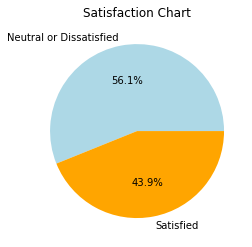

In [8]:
##################################### Satisfaction #################################

fig, chart = plt.subplots()

chart.pie(dfp["satisfaction"].value_counts(),colors=["lightblue", "orange"],
        labels= ["Neutral or Dissatisfied", "Satisfied"], autopct='%1.1f%%')
chart.set(title="Satisfaction Chart");

dfp["satisfaction"].value_counts()

In [9]:
##################################### Gender #################################

df.select(['Gender', 'satisfaction']).groupby('Gender').count().show()
temp = pd.crosstab(dfp['Gender'], dfp['satisfaction'],  margins=True, margins_name="Total")
temp

+------+-----+
|Gender|count|
+------+-----+
|Female|13172|
|  Male|12804|
+------+-----+



satisfaction,neutral or dissatisfied,satisfied,Total
Gender,,,
Female,7437,5735,13172
Male,7136,5668,12804
Total,14573,11403,25976


In [10]:
print("Probability of Female Satisfied               : " + str(5735 / 13172 * 100) + "%")
print("Probability of Female Neutral or Dissatisfied : " + str(7437 / 13172 * 100) + "%")
print("Probability of Male Satisfied                 : " + str(5668 / 12804 * 100) + "%")
print("Probability of Male Neutral or Dissatisfied   : " + str(7136 / 12804 * 100) + "%")

Probability of Female Satisfied               : 43.53932584269663%
Probability of Female Neutral or Dissatisfied : 56.46067415730337%
Probability of Male Satisfied                 : 44.26741643236489%
Probability of Male Neutral or Dissatisfied   : 55.73258356763512%


In [11]:
#ct = pd.crosstab(dfp['satisfaction'],dfp['Gender'])
#ct.plot.bar(rot=0)
#for c in ct.containers:
    
    # set the bar label
   # ct.bar_label(c, label_type='center')

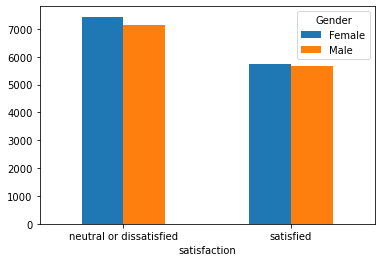

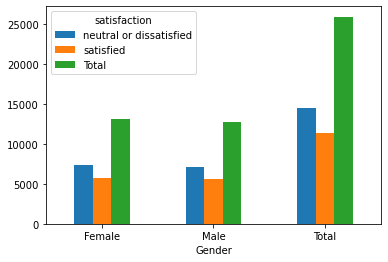

In [12]:
ct = pd.crosstab(dfp['satisfaction'],dfp['Gender'])
barplot = ct.plot.bar(rot=0)

##Pakai Crossbar##
barplot = temp.plot.bar(rot=0)

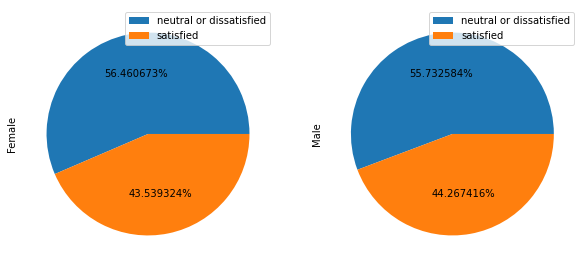

In [13]:
ct.plot.pie(figsize=(10, 10),subplots=True, autopct='%1f%%', labeldistance=None)

plt.show()

In [14]:
##################################### Customer Type #################################

df.select(['Customer Type', 'satisfaction']).groupby('Customer Type').count().show()
temp = pd.crosstab(dfp['Customer Type'], dfp['satisfaction'],  margins=True, margins_name="Total")
temp

+-----------------+-----+
|    Customer Type|count|
+-----------------+-----+
|   Loyal Customer|21177|
|disloyal Customer| 4799|
+-----------------+-----+



satisfaction,neutral or dissatisfied,satisfied,Total
Customer Type,,,
Loyal Customer,10982,10195,21177
disloyal Customer,3591,1208,4799
Total,14573,11403,25976


In [15]:
print("Probability of Loyal Customer Satisfied                     : " + str(10195 / 21177 * 100) + "%")
print("Probability of Loyal Customer Neutral or Dissatisfied       : " + str(10982 / 21177 * 100) + "%")
print("Probability of disloyal Customer Satisfied                  : " + str(1208 / 4799 * 100) + "%")
print("Probability of disloyal Customer Neutral or Dissatisfied    : " + str(3591 / 4799 * 100) + "%")

Probability of Loyal Customer Satisfied                     : 48.141852009255324%
Probability of Loyal Customer Neutral or Dissatisfied       : 51.858147990744676%
Probability of disloyal Customer Satisfied                  : 25.171910814753073%
Probability of disloyal Customer Neutral or Dissatisfied    : 74.82808918524692%


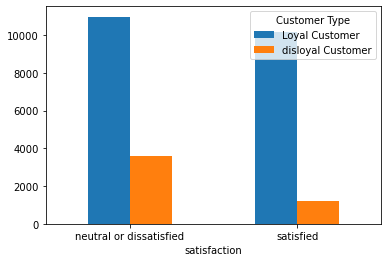

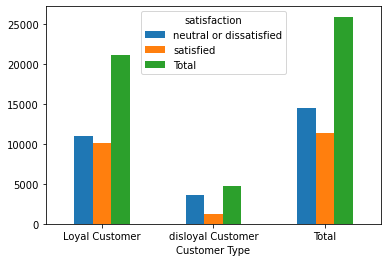

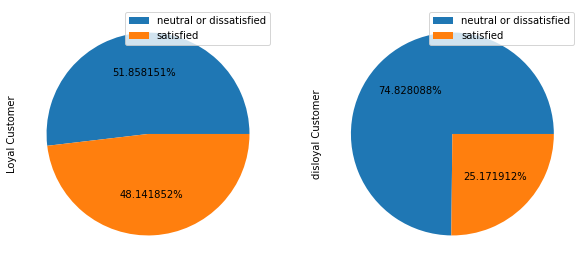

In [16]:
ct = pd.crosstab(dfp['satisfaction'],dfp['Customer Type'])
barplot = ct.plot.bar(rot=0)

##Pakai Crossbar##
barplot = temp.plot.bar(rot=0)

ct.plot.pie(figsize=(10, 10),subplots=True, autopct='%1f%%', labeldistance=None)

plt.show()

In [17]:
################################# Type of Travel #################################

df.select(['Type of Travel', 'satisfaction']).groupby('Type of Travel').count().show()
temp = pd.crosstab(dfp['Type of Travel'], dfp['satisfaction'],  margins=True, margins_name="Total")
temp

+---------------+-----+
| Type of Travel|count|
+---------------+-----+
|Personal Travel| 7938|
|Business travel|18038|
+---------------+-----+



satisfaction,neutral or dissatisfied,satisfied,Total
Type of Travel,,,
Business travel,7428,10610,18038
Personal Travel,7145,793,7938
Total,14573,11403,25976


In [18]:
print("Probability of Business travel Satisfied                  : " + str(10195 / 18038 * 100) + "%")
print("Probability of Business travel Neutral or Dissatisfied    : " + str(7428 / 18038 * 100) + "%")
print("Probability of Personal Travel Satisfied                  : " + str(793 / 7938 * 100) + "%")
print("Probability of Personal Travel Neutral or Dissatisfied    : " + str(7145 / 7938 * 100) + "%")

Probability of Business travel Satisfied                  : 56.51956979709502%
Probability of Business travel Neutral or Dissatisfied    : 41.17973167756958%
Probability of Personal Travel Satisfied                  : 9.9899218946838%
Probability of Personal Travel Neutral or Dissatisfied    : 90.01007810531621%


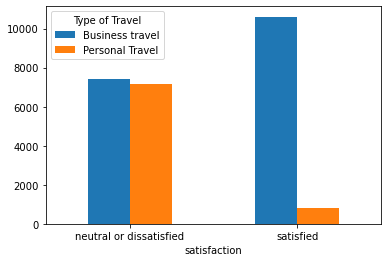

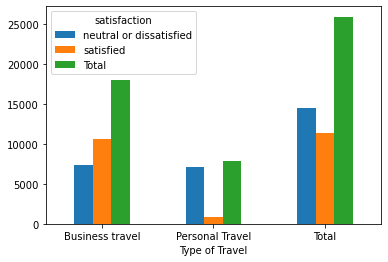

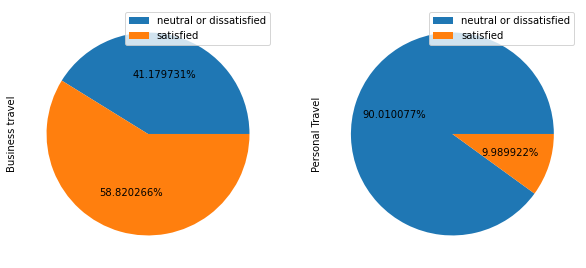

In [19]:
ct = pd.crosstab(dfp['satisfaction'],dfp['Type of Travel'])
barplot = ct.plot.bar(rot=0)

##Pakai Crossbar##
barplot = temp.plot.bar(rot=0)

ct.plot.pie(figsize=(10, 10),subplots=True, autopct='%1f%%', labeldistance=None)

plt.show()

In [20]:
############################### Class #################################

df.select(['Class', 'satisfaction']).groupby('Class').count().show()
temp = pd.crosstab(dfp['Class'], dfp['satisfaction'],  margins=True, margins_name="Total")
temp

+--------+-----+
|   Class|count|
+--------+-----+
|Eco Plus| 1917|
|Business|12495|
|     Eco|11564|
+--------+-----+



satisfaction,neutral or dissatisfied,satisfied,Total
Class,,,
Business,3809,8686,12495
Eco,9322,2242,11564
Eco Plus,1442,475,1917
Total,14573,11403,25976


In [21]:
print("Probability of Business Satisfied                  : " + str(8686 / 12495 * 100) + "%")
print("Probability of Business Neutral or Dissatisfied    : " + str(3809 / 12495 * 100) + "%")
print("Probability of Eco  Satisfied                      : " + str(2242 / 11564 * 100) + "%")
print("Probability of Eco  Neutral or Dissatisfied        : " + str(9322 / 11564 * 100) + "%")
print("Probability of Eco Plus  Satisfied                 : " + str(475 / 1917 * 100) + "%")
print("Probability of Eco Plus  Neutral or Dissatisfied   : " + str(1442 / 1917 * 100) + "%")

Probability of Business Satisfied                  : 69.51580632252902%
Probability of Business Neutral or Dissatisfied    : 30.484193677470987%
Probability of Eco  Satisfied                      : 19.387755102040817%
Probability of Eco  Neutral or Dissatisfied        : 80.61224489795919%
Probability of Eco Plus  Satisfied                 : 24.778299426186752%
Probability of Eco Plus  Neutral or Dissatisfied   : 75.22170057381325%


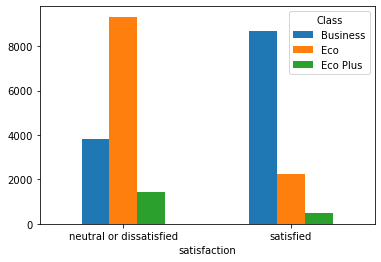

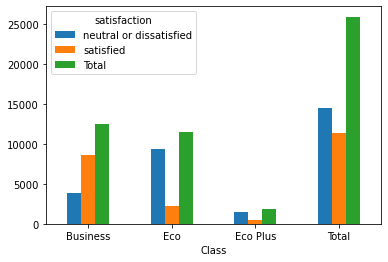

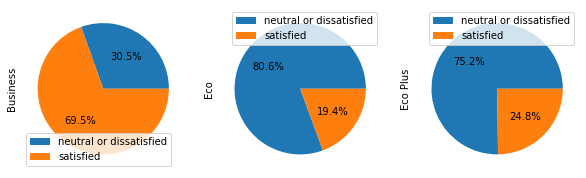

In [22]:
ct = pd.crosstab(dfp['satisfaction'],dfp['Class'])
barplot = ct.plot.bar(rot=0)

##Pakai Crossbar##
barplot = temp.plot.bar(rot=0)

ct.plot.pie(figsize=(10, 10),subplots=True, autopct='%1.1f%%', labeldistance=None)

plt.show()

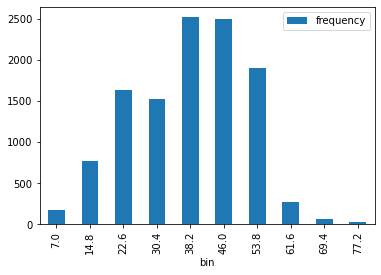

In [23]:
###################################### Age Satisfied ####################################

age_histogram_satisfied = df.select('Age').where(df['satisfaction'] == 'satisfied').rdd.flatMap(lambda x: x).histogram(10)

pd.DataFrame(
    list(zip(*age_histogram_satisfied)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

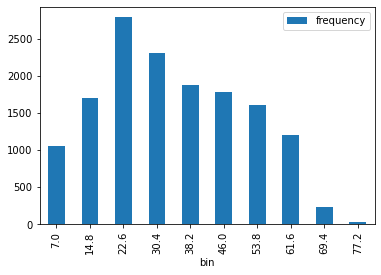

In [24]:
###################################### Age neutral or dissatisfied ####################################

age_histogram_satisfied = df.select('Age').where(df['satisfaction'] == 'neutral or dissatisfied').rdd.flatMap(lambda x: x).histogram(10)

pd.DataFrame(
    list(zip(*age_histogram_satisfied)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

In [25]:
################################## Flight Distance >= 1744 ##################################

df.select(['Gender', 'Age', 'Class', 'Flight Distance', 'satisfaction']).where(df['Flight Distance'] >= 1744).show()

+------+---+--------+---------------+--------------------+
|Gender|Age|   Class|Flight Distance|        satisfaction|
+------+---+--------+---------------+--------------------+
|Female| 36|Business|           2863|           satisfied|
|  Male| 44|Business|           3377|           satisfied|
|Female| 77|Business|           3987|           satisfied|
|Female| 43|Business|           2556|           satisfied|
|Female| 46|Business|           1744|           satisfied|
|Female| 43|     Eco|           1927|neutral or dissat...|
|Female| 50|Business|           3799|           satisfied|
|  Male| 24|Business|           3680|           satisfied|
|  Male| 22|     Eco|           1846|neutral or dissat...|
|Female| 55|Business|           3169|           satisfied|
|Female| 60|Business|           1889|           satisfied|
|Female| 49|Business|           3295|           satisfied|
|Female| 70|     Eco|           1829|neutral or dissat...|
|Female| 19|Business|           2738|           satisfie

In [26]:
############################# Total Delay = Departure Delay + Arrival Delay #############################

df = df.withColumn('Total Delay', df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes'])
df.select(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay', 'Flight Distance', 'satisfaction']).where(df['Flight Distance'] == 160).show()

+--------------------------+------------------------+-----------+---------------+--------------------+
|Departure Delay in Minutes|Arrival Delay in Minutes|Total Delay|Flight Distance|        satisfaction|
+--------------------------+------------------------+-----------+---------------+--------------------+
|                        50|                    44.0|       94.0|            160|           satisfied|
|                         2|                     0.0|        2.0|            160|neutral or dissat...|
|                         0|                     0.0|        0.0|            160|           satisfied|
|                         0|                     0.0|        0.0|            160|neutral or dissat...|
|                         0|                     0.0|        0.0|            160|neutral or dissat...|
|                         0|                     0.0|        0.0|            160|neutral or dissat...|
|                        19|                    17.0|       36.0|        

In [27]:
################################# Features #################################

df = df.withColumn('satisfied', df['satisfaction'] == 'satisfied')
df = df.withColumn('neutral or dissatisfied', df['satisfaction'] == 'neutral or dissatisfied')

from pyspark.sql.types import IntegerType

df = df.withColumn('satisfied', df['satisfied'].cast(IntegerType()))
df = df.withColumn('neutral or dissatisfied', df['neutral or dissatisfied'].cast(IntegerType()))

+---------------------+--------------------------+--------------+----------------------------+
|Inflight wifi service|sum(Inflight wifi service)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------------+--------------------------+--------------+----------------------------+
|                    0|                         0|           811|                           2|
|                    1|                      4488|          1522|                        2966|
|                    2|                     12980|          1567|                        4923|
|                    3|                     18951|          1623|                        4694|
+---------------------+--------------------------+--------------+----------------------------+

+---------------------+--------------------------+--------------+----------------------------+
|Inflight wifi service|sum(Inflight wifi service)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------------+--------------------------

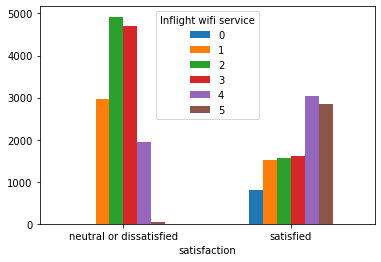

In [28]:
################################# Inflight wifi service #############################

## Hipotesa Not Satisfied <=3 ##

df.select(['Inflight wifi service', 'satisfied', 'neutral or dissatisfied']).groupby('Inflight wifi service').sum().sort(['Inflight wifi service']).where(df['Inflight wifi service'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Inflight wifi service', 'satisfied', 'neutral or dissatisfied']).groupby('Inflight wifi service').sum().sort(['Inflight wifi service']).where(df['Inflight wifi service'] >= 4).show()

print("Probability of Inflight wifi service Satisfied (0-3)               : " + str(5523/ 18108 * 100) + "%")
print("Probability of Inflight wifi service Neutral or Dissatisfied (0-3) : " + str(12585 / 18108 * 100) + "%")

print("Probability of Inflight wifi service Satisfied (4-5)               : " + str(5880 / 7868 * 100) + "%")
print("Probability of Inflight wifi service Neutral or Dissatisfied (4-5) : " + str(1988 / 7868 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Inflight wifi service'])
barplot = ct.plot.bar(rot=0)

+---------------------------------+--------------------------------------+--------------+----------------------------+
|Departure/Arrival time convenient|sum(Departure/Arrival time convenient)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------------------------+--------------------------------------+--------------+----------------------------+
|                                0|                                     0|           694|                         687|
|                                1|                                  3911|          1977|                        1934|
|                                2|                                  8686|          1920|                        2423|
|                                3|                                 13236|          1966|                        2446|
+---------------------------------+--------------------------------------+--------------+----------------------------+

+---------------------------------+------------

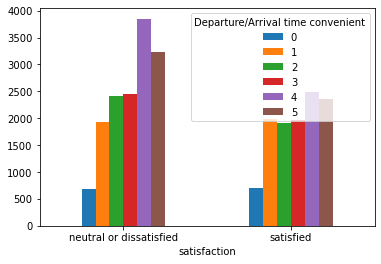

In [29]:
############################### Departure/Arrival time convenient #########################################

## Hipotesa Not Satisfied <=3 ##

df.select(['Departure/Arrival time convenient', 'satisfied', 'neutral or dissatisfied']).groupby('Departure/Arrival time convenient').sum().sort(['Departure/Arrival time convenient']).where(df['Departure/Arrival time convenient'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Departure/Arrival time convenient', 'satisfied', 'neutral or dissatisfied']).groupby('Departure/Arrival time convenient').sum().sort(['Departure/Arrival time convenient']).where(df['Departure/Arrival time convenient'] >= 4).show()

print("Probability of Departure/Arrival time convenient Satisfied (0-3)               : " + str(6557/ 14047 * 100) + "%")
print("Probability of Departure/Arrival time convenient Neutral or Dissatisfied (0-3) : " + str(7490 / 14047 * 100) + "%")

print("Probability of Departure/Arrival time convenient Satisfied (4-5)               : " + str(4846 / 11929 * 100) + "%")
print("Probability of Departure/Arrival time convenient Neutral or Dissatisfied (4-5) : " + str(7083 / 11929 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Departure/Arrival time convenient'])
barplot = ct.plot.bar(rot=0)

+----------------------+---------------------------+--------------+----------------------------+
|Ease of Online booking|sum(Ease of Online booking)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------------+---------------------------+--------------+----------------------------+
|                     0|                          0|           802|                         393|
|                     1|                       4361|          1715|                        2646|
|                     2|                      12060|          1819|                        4211|
|                     3|                      17832|          1888|                        4056|
+----------------------+---------------------------+--------------+----------------------------+

+----------------------+---------------------------+--------------+----------------------------+
|Ease of Online booking|sum(Ease of Online booking)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------------+-----

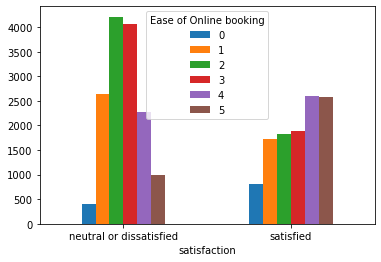

In [30]:
############################ Ease of Online booking ######################################

## Hipotesa Not Satisfied <=3 ##

df.select(['Ease of Online booking', 'satisfied', 'neutral or dissatisfied']).groupby('Ease of Online booking').sum().sort(['Ease of Online booking']).where(df['Ease of Online booking'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Ease of Online booking', 'satisfied', 'neutral or dissatisfied']).groupby('Ease of Online booking').sum().sort(['Ease of Online booking']).where(df['Ease of Online booking'] >= 4).show()

print("Probability of Ease of Online booking Satisfied (0-3)               : " + str(6224/ 17530 * 100) + "%")
print("Probability of Ease of Online booking Neutral or Dissatisfied (0-3) : " + str(11306 / 17530 * 100) + "%")

print("Probability of Ease of Online booking Satisfied (4-5)               : " + str(5179 / 8446 * 100) + "%")
print("Probability of Ease of Online booking Neutral or Dissatisfied (4-5) : " + str(3267 / 8446 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Ease of Online booking'])
barplot = ct.plot.bar(rot=0)

+-------------+------------------+--------------+----------------------------+
|Gate location|sum(Gate location)|sum(satisfied)|sum(neutral or dissatisfied)|
+-------------+------------------+--------------+----------------------------+
|            1|              4429|          2268|                        2161|
|            2|              9674|          2303|                        2534|
|            3|             21420|          2474|                        4666|
+-------------+------------------+--------------+----------------------------+

+-------------+------------------+--------------+----------------------------+
|Gate location|sum(Gate location)|sum(satisfied)|sum(neutral or dissatisfied)|
+-------------+------------------+--------------+----------------------------+
|            4|             24160|          2413|                        3627|
|            5|             17650|          1945|                        1585|
+-------------+------------------+--------------+--

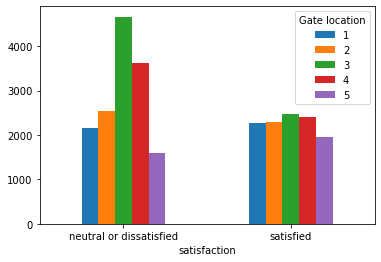

In [31]:
############################### Gate location ########################

## Hipotesa Not Satisfied <=3 ##

df.select(['Gate location', 'satisfied', 'neutral or dissatisfied']).groupby('Gate location').sum().sort(['Gate location']).where(df['Gate location'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Gate location', 'satisfied', 'neutral or dissatisfied']).groupby('Gate location').sum().sort(['Gate location']).where(df['Gate location'] >= 4).show()

print("Probability of Gate location Satisfied (0-3)               : " + str(7045/ 16406 * 100) + "%")
print("Probability of Gate location Neutral or Dissatisfied (0-3) : " + str(9361 / 16406 * 100) + "%")

print("Probability of Gate location Satisfied (4-5)               : " + str(4358 / 9570  * 100) + "%")
print("Probability of Gate location Neutral or Dissatisfied (4-5) : " + str(5212 / 9570  * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Gate location'])
barplot = ct.plot.bar(rot=0)

+--------------+-------------------+--------------+----------------------------+
|Food and drink|sum(Food and drink)|sum(satisfied)|sum(neutral or dissatisfied)|
+--------------+-------------------+--------------+----------------------------+
|             0|                  0|             5|                          20|
|             1|               3214|           635|                        2579|
|             2|              10790|          2122|                        3273|
|             3|              16482|          2207|                        3287|
+--------------+-------------------+--------------+----------------------------+

+--------------+-------------------+--------------+----------------------------+
|Food and drink|sum(Food and drink)|sum(satisfied)|sum(neutral or dissatisfied)|
+--------------+-------------------+--------------+----------------------------+
|             4|              24816|          3283|                        2921|
|             5|           

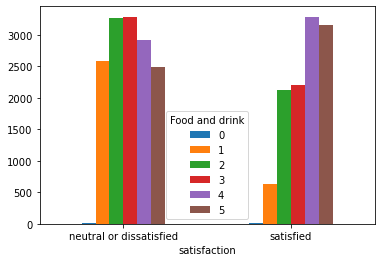

In [32]:
######################### Food and drink ###########################

## Hipotesa Not Satisfied <=3 ##

df.select(['Food and drink', 'satisfied', 'neutral or dissatisfied']).groupby('Food and drink').sum().sort(['Food and drink']).where(df['Food and drink'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Food and drink', 'satisfied', 'neutral or dissatisfied']).groupby('Food and drink').sum().sort(['Food and drink']).where(df['Food and drink'] >= 4).show()

print("Probability of Food and drink Satisfied (0-3)               : " + str(4969/ 14128 * 100) + "%")
print("Probability of Food and drink Neutral or Dissatisfied (0-3) : " + str(9159 / 14128 * 100) + "%")

print("Probability of Food and drink Satisfied (4-5)               : " + str(6434 / 11848 * 100) + "%")
print("Probability of Food and drink Neutral or Dissatisfied (4-5) : " + str(5414 / 11848 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Food and drink'])
barplot = ct.plot.bar(rot=0)

+---------------+--------------------+--------------+----------------------------+
|Online boarding|sum(Online boarding)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------+--------------------+--------------+----------------------------+
|              0|                   0|           388|                         264|
|              1|                2569|           354|                        2215|
|              2|                8858|           493|                        3936|
|              3|               15939|           773|                        4540|
+---------------+--------------------+--------------+----------------------------+

+---------------+--------------------+--------------+----------------------------+
|Online boarding|sum(Online boarding)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------+--------------------+--------------+----------------------------+
|              4|               30824|          4800|                        2906|
|  

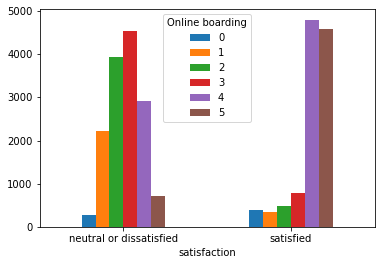

In [33]:
################################# Online boarding #############################

## Hipotesa Not Satisfied <=3 ##

df.select(['Online boarding', 'satisfied', 'neutral or dissatisfied']).groupby('Online boarding').sum().sort(['Online boarding']).where(df['Online boarding'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Online boarding', 'satisfied', 'neutral or dissatisfied']).groupby('Online boarding').sum().sort(['Online boarding']).where(df['Online boarding'] >= 4).show()

print("Probability of Online boarding Satisfied (0-3)               : " + str(2008/ 12963 * 100) + "%")
print("Probability of Online boarding Neutral or Dissatisfied (0-3) : " + str(10955 / 12963 * 100) + "%")

print("Probability of Online boarding Satisfied (4-5)               : " + str(9395 / 13013 * 100) + "%")
print("Probability of Online boarding Neutral or Dissatisfied (4-5) : " + str(3618 / 13013 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Online boarding'])
barplot = ct.plot.bar(rot=0)

+------------+-----------------+--------------+----------------------------+
|Seat comfort|sum(Seat comfort)|sum(satisfied)|sum(neutral or dissatisfied)|
+------------+-----------------+--------------+----------------------------+
|           1|             3033|           679|                        2354|
|           2|             7264|           849|                        2783|
|           3|            13896|          1039|                        3593|
+------------+-----------------+--------------+----------------------------+

+------------+-----------------+--------------+----------------------------+
|Seat comfort|sum(Seat comfort)|sum(satisfied)|sum(neutral or dissatisfied)|
+------------+-----------------+--------------+----------------------------+
|           4|            31964|          4450|                        3541|
|           5|            33440|          4386|                        2302|
+------------+-----------------+--------------+----------------------------

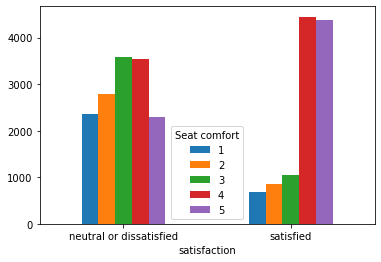

In [34]:
################################# Seat comfort ##########################\

## Hipotesa Not Satisfied <=3 ##

df.select(['Seat comfort', 'satisfied', 'neutral or dissatisfied']).groupby('Seat comfort').sum().sort(['Seat comfort']).where(df['Seat comfort'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Seat comfort', 'satisfied', 'neutral or dissatisfied']).groupby('Seat comfort').sum().sort(['Seat comfort']).where(df['Seat comfort'] >= 4).show()

print("Probability of Seat comfort Satisfied (0-3)               : " + str(2567/ 11297 * 100) + "%")
print("Probability of Seat comfort Neutral or Dissatisfied (0-3) : " + str(8730 / 11297 * 100) + "%")

print("Probability of Seat comfort Satisfied (4-5)               : " + str(8836 / 14679 * 100) + "%")
print("Probability of Seat comfort Neutral or Dissatisfied (4-5) : " + str(5843 / 14679 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Seat comfort'])
barplot = ct.plot.bar(rot=0)

+----------------------+---------------------------+--------------+----------------------------+
|Inflight entertainment|sum(Inflight entertainment)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------------+---------------------------+--------------+----------------------------+
|                     0|                          0|             0|                           4|
|                     1|                       3197|           480|                        2717|
|                     2|                       8662|           910|                        3421|
|                     3|                      14235|          1355|                        3390|
+----------------------+---------------------------+--------------+----------------------------+

+----------------------+---------------------------+--------------+----------------------------+
|Inflight entertainment|sum(Inflight entertainment)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------------+-----

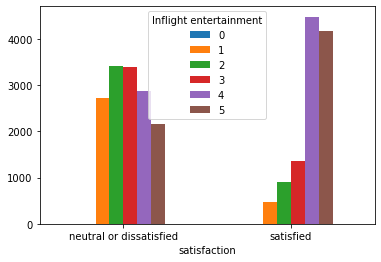

In [35]:
############################### Inflight entertainment ############################

## Hipotesa Not Satisfied <=3 ##

df.select(['Inflight entertainment', 'satisfied', 'neutral or dissatisfied']).groupby('Inflight entertainment').sum().sort(['Inflight entertainment']).where(df['Inflight entertainment'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Inflight entertainment', 'satisfied', 'neutral or dissatisfied']).groupby('Inflight entertainment').sum().sort(['Inflight entertainment']).where(df['Inflight entertainment'] >= 4).show()

print("Probability of Inflight entertainment Satisfied (0-3)               : " + str(2745/ 12277 * 100) + "%")
print("Probability of Inflight entertainment Neutral or Dissatisfied (0-3) : " + str(9532 / 12277 * 100) + "%")

print("Probability of Inflight entertainment Satisfied (4-5)               : " + str(8658 / 13699 * 100) + "%")
print("Probability of Inflight entertainment Neutral or Dissatisfied (4-5) : " + str(5041 / 13699 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Inflight entertainment'])
barplot = ct.plot.bar(rot=0)

+----------------+---------------------+--------------+----------------------------+
|On-board service|sum(On-board service)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               0|                    0|             0|                           2|
|               1|                 2915|           608|                        2307|
|               2|                 7340|           934|                        2736|
|               3|                17127|          1871|                        3838|
+----------------+---------------------+--------------+----------------------------+

+----------------+---------------------+--------------+----------------------------+
|On-board service|sum(On-board service)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               4|                31344|          4119|         

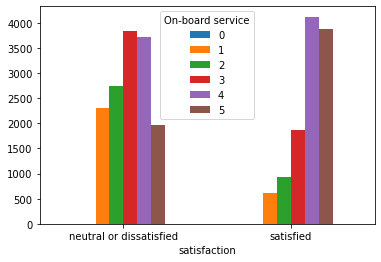

In [36]:
############################# On-board service ###########################

## Hipotesa Not Satisfied <=3 ##

df.select(['On-board service', 'satisfied', 'neutral or dissatisfied']).groupby('On-board service').sum().sort(['On-board service']).where(df['On-board service'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['On-board service', 'satisfied', 'neutral or dissatisfied']).groupby('On-board service').sum().sort(['On-board service']).where(df['On-board service'] >= 4).show()

print("Probability of On-board service Satisfied (0-3)               : " + str(3413/ 12296 * 100) + "%")
print("Probability of On-board service Neutral or Dissatisfied (0-3) : " + str(8883 / 12296 * 100) + "%")

print("Probability of On-board service Satisfied (4-5)               : " + str(7990 / 13680 * 100) + "%")
print("Probability of On-board service Neutral or Dissatisfied (4-5) : " + str(5690 / 13680 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['On-board service'])
barplot = ct.plot.bar(rot=0)

+----------------+---------------------+--------------+----------------------------+
|Leg room service|sum(Leg room service)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               0|                    0|            40|                          86|
|               1|                 2542|           532|                        2010|
|               2|                10030|          1392|                        3623|
|               3|                14874|          1442|                        3516|
+----------------+---------------------+--------------+----------------------------+

+----------------+---------------------+--------------+----------------------------+
|Leg room service|sum(Leg room service)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               4|                28388|          4161|         

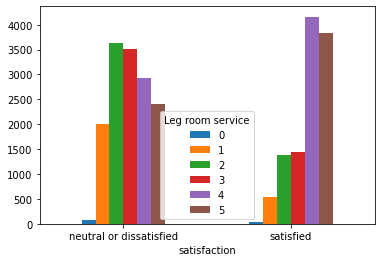

In [37]:
######################### Leg room service ##########################

## Hipotesa Not Satisfied <=3 ##

df.select(['Leg room service', 'satisfied', 'neutral or dissatisfied']).groupby('Leg room service').sum().sort(['Leg room service']).where(df['Leg room service'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Leg room service', 'satisfied', 'neutral or dissatisfied']).groupby('Leg room service').sum().sort(['Leg room service']).where(df['Leg room service'] >= 4).show()

print("Probability of Leg room service Satisfied (0-3)               : " + str(3406/ 12641 * 100) + "%")
print("Probability of Leg room service Neutral or Dissatisfied (0-3) : " + str(9235 / 12641 * 100) + "%")

print("Probability of Leg room service Satisfied (4-5)               : " + str(7997 / 13335 * 100) + "%")
print("Probability of Leg room service Neutral or Dissatisfied (4-5) : " + str(5338 / 13335 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Leg room service'])
barplot = ct.plot.bar(rot=0)

+----------------+---------------------+--------------+----------------------------+
|Baggage handling|sum(Baggage handling)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               1|                 1791|           557|                        1234|
|               2|                 5682|           820|                        2021|
|               3|                15657|          1286|                        3933|
+----------------+---------------------+--------------+----------------------------+

+----------------+---------------------+--------------+----------------------------+
|Baggage handling|sum(Baggage handling)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               4|                37512|          4497|                        4881|
|               5|                33735|          4243|         

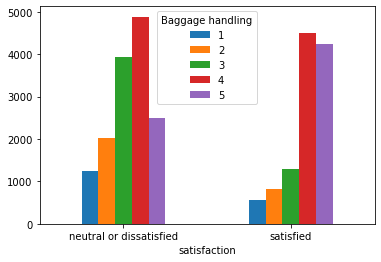

In [38]:
################################## Baggage handling ############################

## Hipotesa Not Satisfied <=3 ##

df.select(['Baggage handling', 'satisfied', 'neutral or dissatisfied']).groupby('Baggage handling').sum().sort(['Baggage handling']).where(df['Baggage handling'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Baggage handling', 'satisfied', 'neutral or dissatisfied']).groupby('Baggage handling').sum().sort(['Baggage handling']).where(df['Baggage handling'] >= 4).show()

print("Probability of Baggage handling Satisfied (0-3)               : " + str(2663/ 9851 * 100) + "%")
print("Probability of Baggage handling Neutral or Dissatisfied (0-3) : " + str(7188 / 9851 * 100) + "%")

print("Probability of Baggage handling Satisfied (4-5)               : " + str(8740/ 16125 * 100) + "%")
print("Probability of Baggage handling Neutral or Dissatisfied (4-5) : " + str(7385 / 16125 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Baggage handling'])
barplot = ct.plot.bar(rot=0)

+---------------+--------------------+--------------+----------------------------+
|Checkin service|sum(Checkin service)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------+--------------------+--------------+----------------------------+
|              1|                3218|           775|                        2443|
|              2|                6418|           787|                        2422|
|              3|               21021|          3230|                        3777|
+---------------+--------------------+--------------+----------------------------+

+---------------+--------------------+--------------+----------------------------+
|Checkin service|sum(Checkin service)|sum(satisfied)|sum(neutral or dissatisfied)|
+---------------+--------------------+--------------+----------------------------+
|              4|               29112|          3351|                        3927|
|              5|               26320|          3260|                        2004|
+--

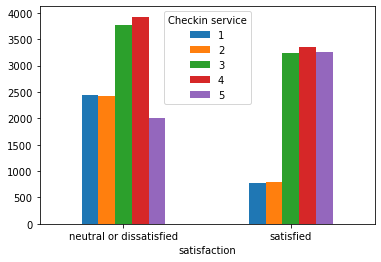

In [39]:
################################ Checkin service ##########################

## Hipotesa Not Satisfied <=3 ##

df.select(['Checkin service', 'satisfied', 'neutral or dissatisfied']).groupby('Checkin service').sum().sort(['Checkin service']).where(df['Checkin service'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Checkin service', 'satisfied', 'neutral or dissatisfied']).groupby('Checkin service').sum().sort(['Checkin service']).where(df['Checkin service'] >= 4).show()

print("Probability of Checkin service Satisfied (0-3)               : " + str(4792/ 13434 * 100) + "%")
print("Probability of Checkin service Neutral or Dissatisfied (0-3) : " + str(8642 / 13434 * 100) + "%")

print("Probability of Checkin service Satisfied (4-5)               : " + str(6611/ 12542 * 100) + "%")
print("Probability of Checkin service Neutral or Dissatisfied (4-5) : " + str(5931 / 12542 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Checkin service'])
barplot = ct.plot.bar(rot=0)

+----------------+---------------------+--------------+----------------------------+
|Inflight service|sum(Inflight service)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               0|                    0|             0|                           2|
|               1|                 1778|           534|                        1244|
|               2|                 5702|           854|                        1997|
|               3|                15051|          1232|                        3785|
+----------------+---------------------+--------------+----------------------------+

+----------------+---------------------+--------------+----------------------------+
|Inflight service|sum(Inflight service)|sum(satisfied)|sum(neutral or dissatisfied)|
+----------------+---------------------+--------------+----------------------------+
|               4|                37512|          4503|         

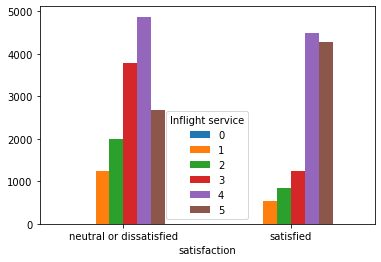

In [40]:
####################### Inflight service #############################

## Hipotesa Not Satisfied <=3 ##

df.select(['Inflight service', 'satisfied', 'neutral or dissatisfied']).groupby('Inflight service').sum().sort(['Inflight service']).where(df['Inflight service'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Inflight service', 'satisfied', 'neutral or dissatisfied']).groupby('Inflight service').sum().sort(['Inflight service']).where(df['Inflight service'] >= 4).show()

print("Probability of Inflight service Satisfied (0-3)               : " + str(2620/ 9648 * 100) + "%")
print("Probability of Inflight service Neutral or Dissatisfied (0-3) : " + str(7028 / 9648 * 100) + "%")

print("Probability of Inflight service Satisfied (4-5)               : " + str(8788/ 16328 * 100) + "%")
print("Probability of Inflight service Neutral or Dissatisfied (4-5) : " + str(7545 / 16328 * 100) + "%")

ct = pd.crosstab(dfp['satisfaction'],dfp['Inflight service'])
barplot = ct.plot.bar(rot=0)

+-----------+----------------+--------------+----------------------------+
|Cleanliness|sum(Cleanliness)|sum(satisfied)|sum(neutral or dissatisfied)|
+-----------+----------------+--------------+----------------------------+
|          0|               0|             0|                           2|
|          1|            3411|           682|                        2729|
|          2|            7962|           841|                        3140|
|          3|           18195|          2656|                        3409|
+-----------+----------------+--------------+----------------------------+

+-----------+----------------+--------------+----------------------------+
|Cleanliness|sum(Cleanliness)|sum(satisfied)|sum(neutral or dissatisfied)|
+-----------+----------------+--------------+----------------------------+
|          4|           27160|          3633|                        3157|
|          5|           28635|          3591|                        2136|
+-----------+-----------

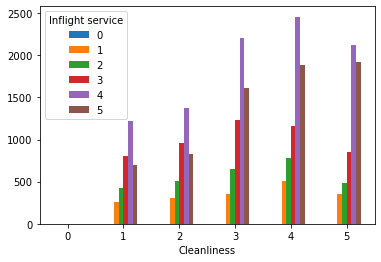

In [41]:
######################### Cleanliness #######################

## Hipotesa Not Satisfied <=3 ##

df.select(['Cleanliness', 'satisfied', 'neutral or dissatisfied']).groupby('Cleanliness').sum().sort(['Cleanliness']).where(df['Cleanliness'] <= 3).show()

## Hipotesa Satisfied >3 ##

df.select(['Cleanliness', 'satisfied', 'neutral or dissatisfied']).groupby('Cleanliness').sum().sort(['Cleanliness']).where(df['Cleanliness'] >= 4).show()

print("Probability of Cleanliness Satisfied (0-3)               : " + str(4179/ 13459 * 100) + "%")
print("Probability of Cleanliness Neutral or Dissatisfied (0-3) : " + str(9280 / 13459 * 100) + "%")

print("Probability of Cleanliness Satisfied (4-5)               : " + str(7224/ 12517 * 100) + "%")
print("Probability of Cleanliness Neutral or Dissatisfied (4-5) : " + str(5293 / 12517 * 100) + "%")

ct = pd.crosstab(dfp['Cleanliness'],dfp['Inflight service'])
barplot = ct.plot.bar(rot=0)

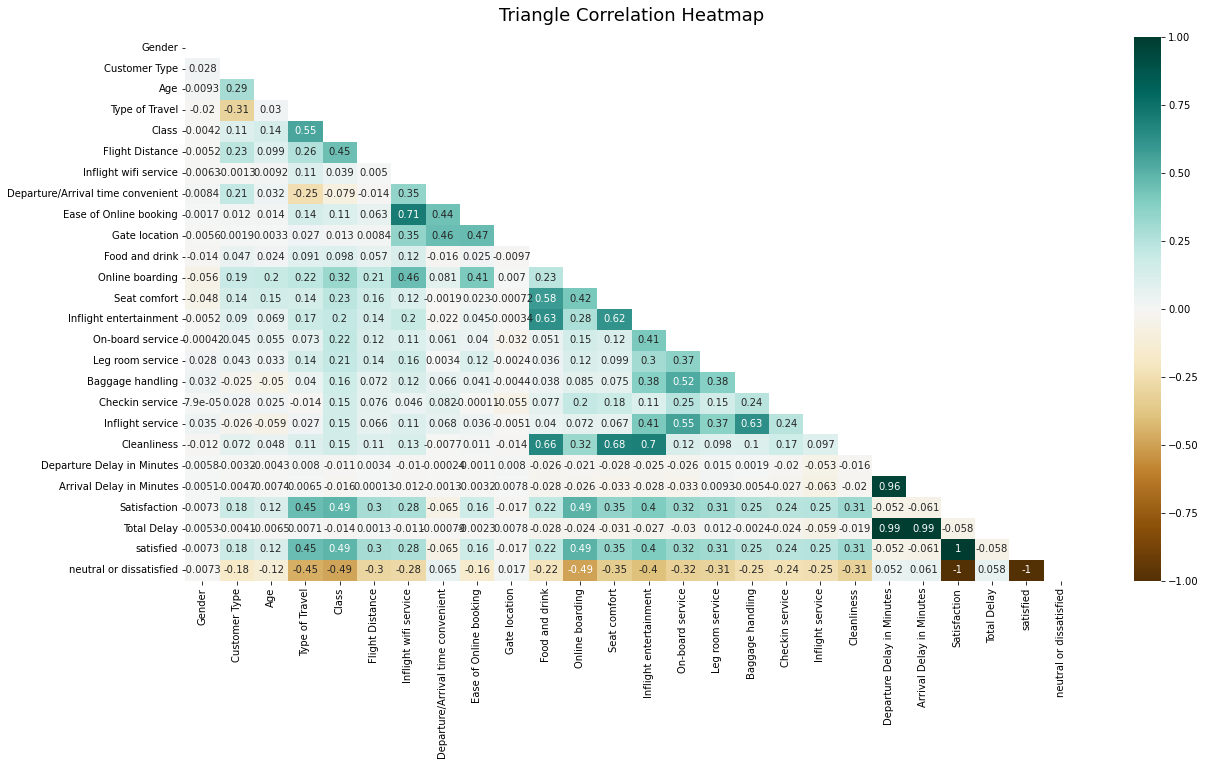

In [42]:
#df.show()
#indexing categorical values
from pyspark.sql.functions import col
from pyspark.sql.functions import when
df= df.withColumn("Gender", when(col("Gender")=='Male', 1).otherwise(0))
df = df.withColumn("Customer Type", when(col("Customer Type")=='Loyal Customer', 1).otherwise(0))
df = df.withColumn("Type of Travel", when(col("Type of Travel")=='Business travel', 1).otherwise(0))
df = df.withColumn("Class", when(col("Class")=='Business', 2).otherwise( when(col("Class")=='Eco Plus', 1).otherwise(0)))
df = df.withColumn("Satisfaction", when(col("Satisfaction")=='satisfied', 1).otherwise(0))
#df.show()
dff = df.select("*").toPandas()
dff
dff.astype(float)
corr = dff.astype('float64').corr()
corr
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [43]:
#drop Gender, Departure/Arrival time convenient, Gate location, Departure Delay in Minutes, Arrival Delay in Minutes, Total Delay
#Nilai korelasi terhadap satisfaction mendekati 0

df_dt = df.select(['Customer Type', 'Age','Type of Travel', 'Class', 'Flight Distance','Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Satisfaction'])

In [44]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler

In [45]:
columns_to_scale = ['Customer Type', 'Age','Type of Travel', 'Class', 'Flight Distance','Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(df_dt)
scaledData = scalerModel.transform(df_dt)

In [46]:
#combine feature ke 1 column
assemblerInputs = ['Customer Type', 'Age','Type of Travel', 'Class', 'Flight Distance','Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
vector_assembler = VectorAssembler(inputCols=assemblerInputs,outputCol="Features")
assembler_temp = vector_assembler.transform(df_dt)

In [47]:
#drop each features
assembler = assembler_temp.drop('Customer Type', 'Age','Type of Travel', 'Class', 'Flight Distance','Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness')

In [48]:
##Bagi Dataset 80,20
(trainDataset, testDataset) = assembler.randomSplit([0.8,0.2])

In [49]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [50]:
##Algo Decision Tree Cllassifier
dt_model = DecisionTreeClassifier(labelCol="Satisfaction", featuresCol="Features")
model = dt_model.fit(trainDataset)

predictions = model.transform(testDataset)
predictions.show()
#predictions.where(predictions['Satisfaction']==1).show()

+------------+--------------------+--------------+--------------------+----------+
|Satisfaction|            Features| rawPrediction|         probability|prediction|
+------------+--------------------+--------------+--------------------+----------+
|           0|[0.0,7.0,1.0,0.0,...|[8438.0,620.0]|[0.93155221903289...|       0.0|
|           0|[0.0,8.0,1.0,0.0,...| [182.0,149.0]|[0.54984894259818...|       0.0|
|           0|[0.0,8.0,1.0,0.0,...|[8438.0,620.0]|[0.93155221903289...|       0.0|
|           0|[0.0,9.0,1.0,0.0,...|[8438.0,620.0]|[0.93155221903289...|       0.0|
|           0|[0.0,9.0,1.0,0.0,...|[8438.0,620.0]|[0.93155221903289...|       0.0|
|           0|[0.0,9.0,1.0,0.0,...|[8438.0,620.0]|[0.93155221903289...|       0.0|
|           0|[0.0,9.0,1.0,0.0,...| [439.0,640.0]|[0.40685820203892...|       1.0|
|           0|[0.0,9.0,1.0,0.0,...| [439.0,640.0]|[0.40685820203892...|       1.0|
|           0|[0.0,9.0,1.0,0.0,...|[8438.0,620.0]|[0.93155221903289...|       0.0|
|   

In [51]:
evaluator = MulticlassClassificationEvaluator(labelCol="Satisfaction", predictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print("Accuracy : ", accuracy)

Accuracy :  0.9027308001626875


In [52]:
model.featureImportances

SparseVector(17, {0: 0.0137, 2: 0.1902, 5: 0.2359, 6: 0.0006, 8: 0.4973, 10: 0.0411, 11: 0.0036, 14: 0.0177})